In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import glob
from astropy.io import fits
from scipy.ndimage import interpolation as interp
from skimage.feature.register_translation import (register_translation, _upsampled_dft)
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_grid(datacube,imagenames):
    no_A=len(datacube)
    xplots=int(np.around(np.sqrt(no_A)))
    yplots=xplots+1
    gs=gridspec.GridSpec(yplots,xplots)
    plt.figure(figsize=(15,15))
    for i in range(no_A):
        B=datacube[i]
        plt.subplot(gs[i])
        plt.imshow(np.log10(B),origin='lower',cmap='gray')
        plt.title(imagenames[i])

In [3]:
cd Downloads

/Users/urjashah/Downloads


In [4]:
cd SPICAM

/Users/urjashah/Downloads/SPICAM


In [5]:
cd Q4UV04

/Users/urjashah/Downloads/SPICAM/Q4UV04


In [6]:
cd UT101016

/Users/urjashah/Downloads/SPICAM/Q4UV04/UT101016


In [7]:
bias_list=glob.glob('Bias*fits')

In [8]:
vflat_list=glob.glob('Flat*fits')

In [9]:
ls

Bias.0071.fits            Landolt28.0023.fits       NGC0695.0017.fits
Bias.0072.fits            Landolt28.0024.fits       NGC0695.0018.fits
Bias.0073.fits            Landolt28.0025.fits       NGC0695.0019.fits
Bias.0074.fits            Landolt28.0026.fits       NGC0695.0020.fits
Bias.0075.fits            Landolt28.0027.fits       VIIZw031.0030.fits
Bias.0076.fits            Landolt53.0055.fits       VIIZw031.0031.fits
Bias.0077.fits            Landolt53.0056.fits       VIIZw031.0032.fits
Bias.0078.fits            Landolt53.0057.fits       VIIZw031.0033.fits
Bias.0079.fits            Landolt53.0058.fits       VIIZw031.0034.fits
Bias.0080.fits            Landolt53.0059.fits       VIIZw031.0035.fits
CCD_MasterBias.fits       Landolt53.0060.fits       VIIZw031.0037.fits
CCD_MasterFlat.fits       MasterImage**.fits        VIIZw031.0038.fits
Dark.0081.fits            MasterImage.fits          VIIZw031.0039.fits
Dark.0082.fits            MasterSci**.fits          VIIZw031.0040.fits
Dark.0083.

In [10]:
sci_list = glob.glob('NGC0695*fits')

In [11]:
all_images_list= bias_list + vflat_list +sci_list

In [12]:
raw_image_data = {}
for image_name in all_images_list: raw_image_data[image_name]=fits.getdata(image_name)

In [13]:
biascube= np.stack([raw_image_data[bias_frame] for bias_frame in bias_list], axis=0)

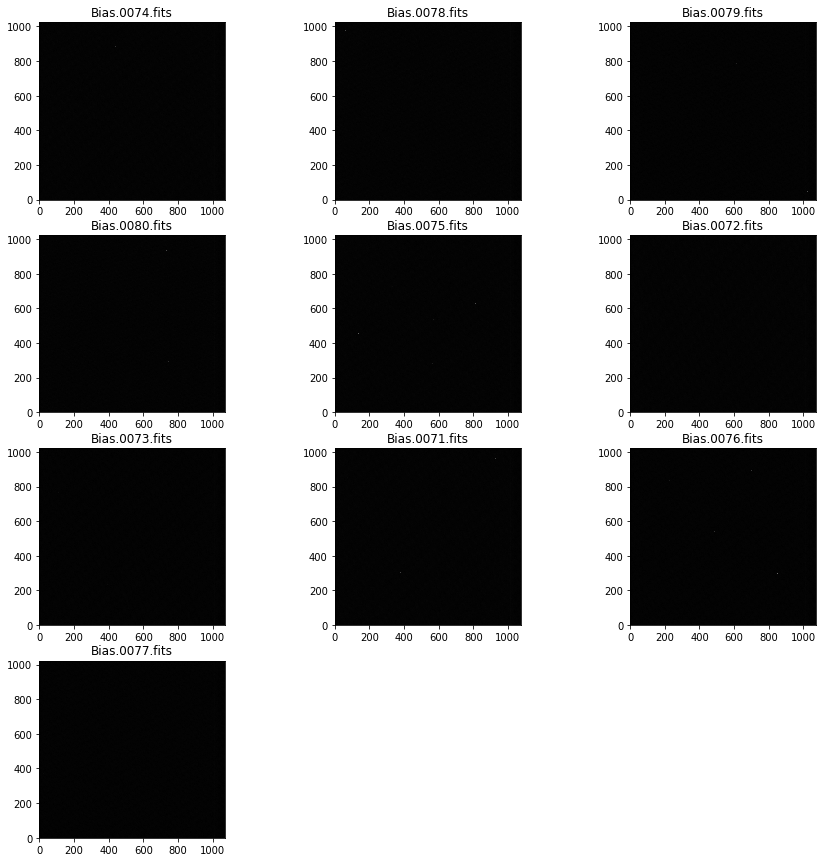

In [14]:
plot_grid(biascube,bias_list)

In [15]:
vflatcube = np.stack([raw_image_data[vflat_frame] for vflat_frame in vflat_list], axis=0)
scicube = np.stack([raw_image_data[science_frame] for science_frame in sci_list], axis=0)

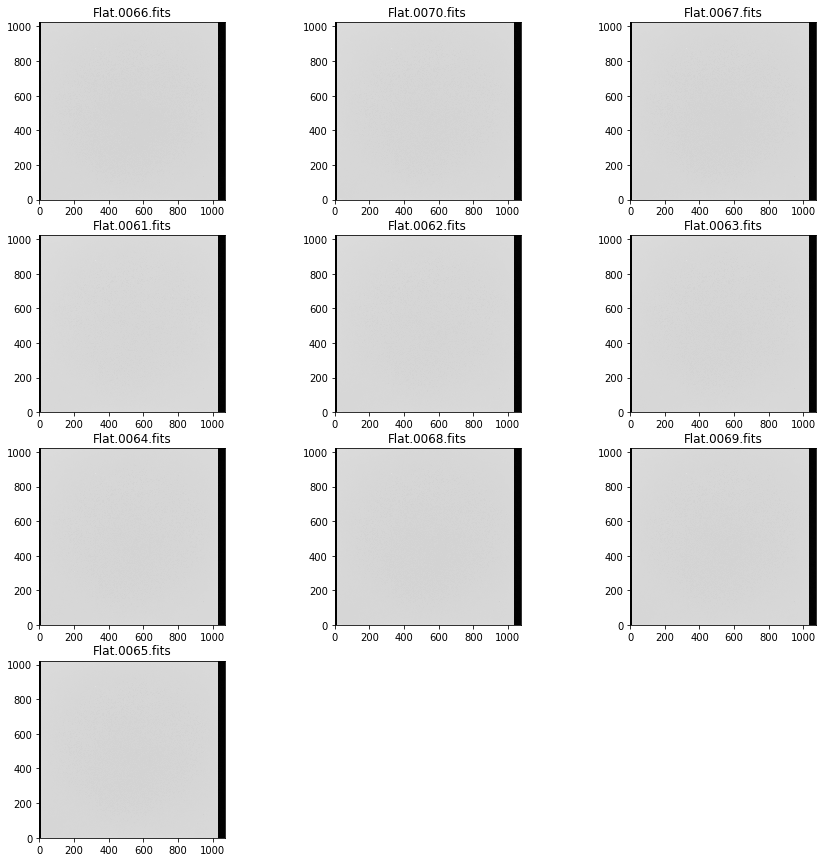

In [16]:
plot_grid(vflatcube,vflat_list)

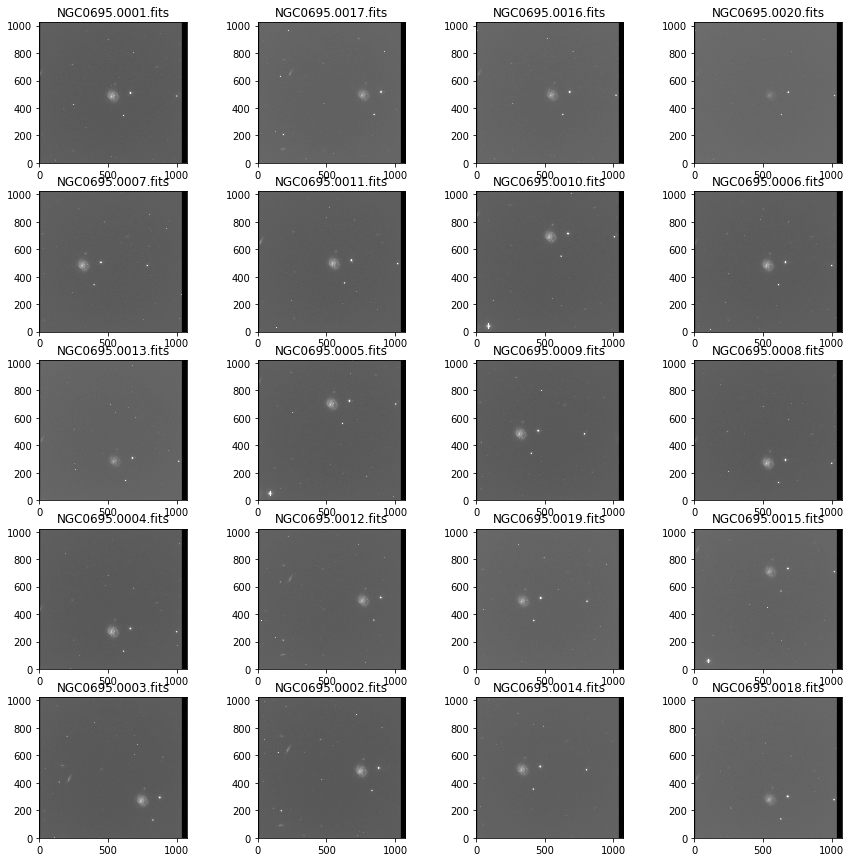

In [17]:
plot_grid(scicube,sci_list)

In [18]:
master_bias =np.average(biascube, axis=0)

Text(0.5,1,'Master Bias')

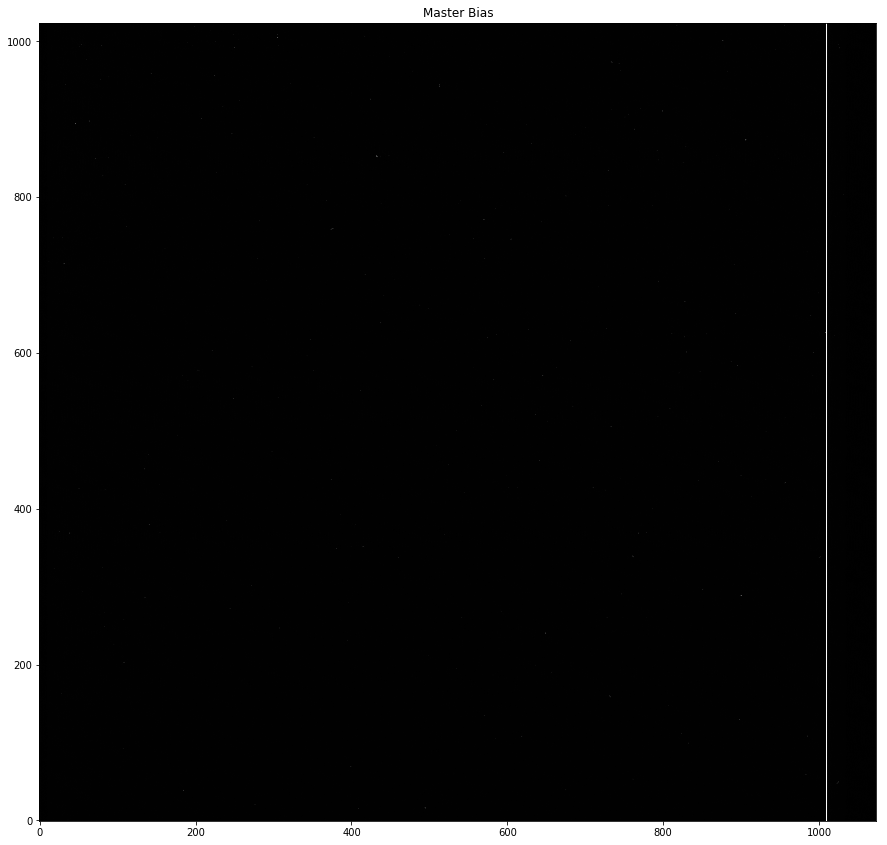

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(master_bias),origin='lower',cmap='gray');
plt.title('Master Bias')

In [20]:
bias_list

['Bias.0074.fits',
 'Bias.0078.fits',
 'Bias.0079.fits',
 'Bias.0080.fits',
 'Bias.0075.fits',
 'Bias.0072.fits',
 'Bias.0073.fits',
 'Bias.0071.fits',
 'Bias.0076.fits',
 'Bias.0077.fits']

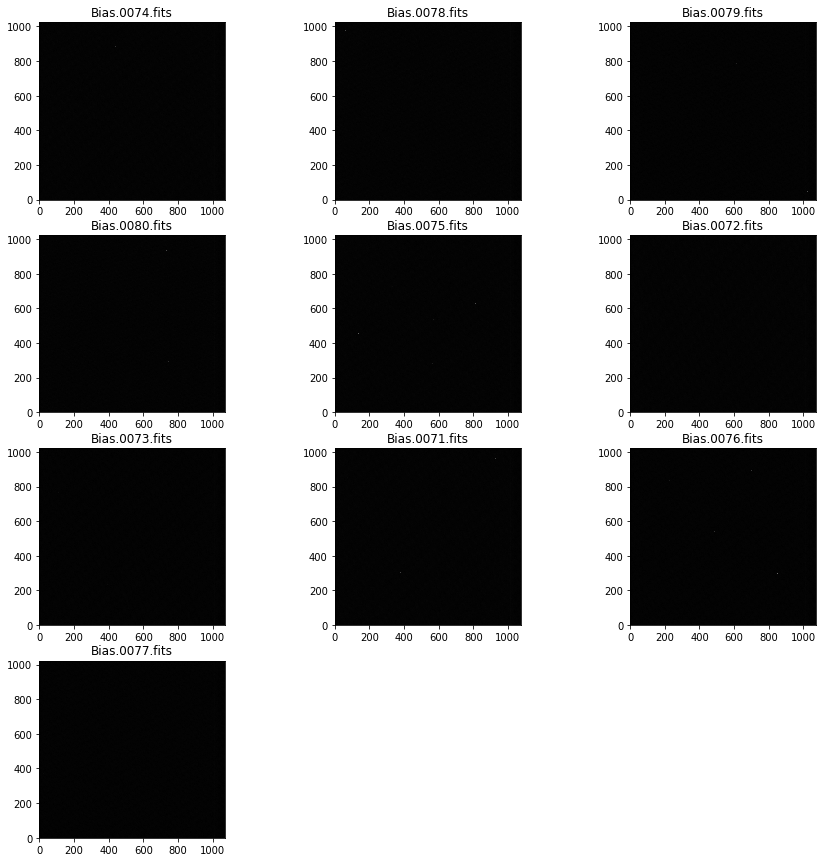

In [21]:
plot_grid(biascube,bias_list)

In [22]:
vflatcube = np.stack([raw_image_data[vflat_frame] for vflat_frame in vflat_list], axis=0)

In [23]:
scicube = np.stack([raw_image_data[science_frame] for science_frame in sci_list], axis=0)

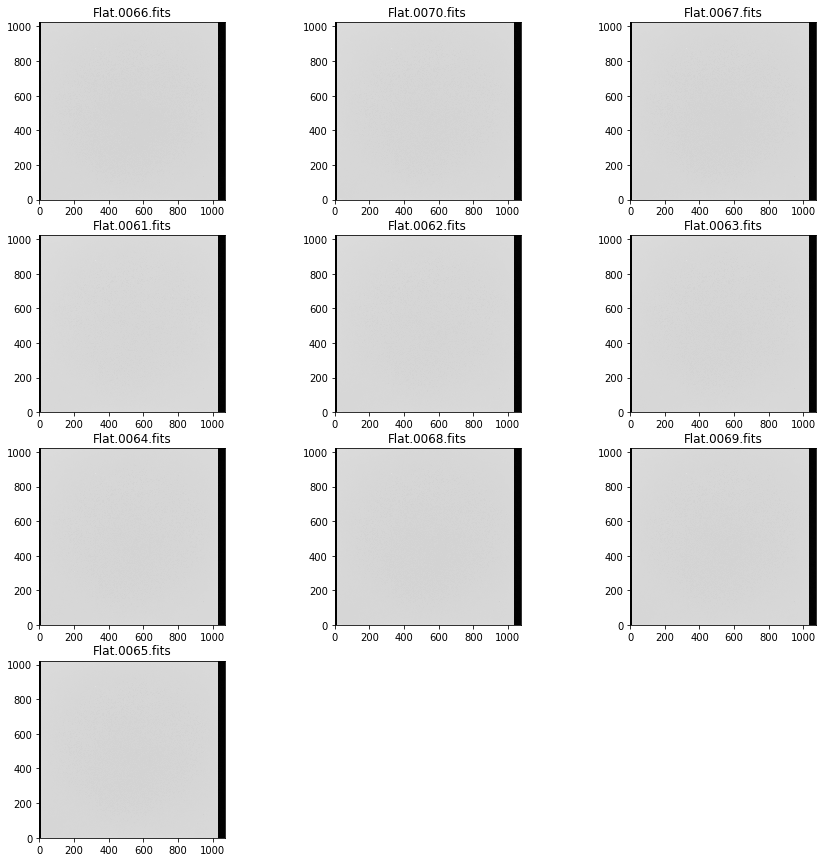

In [24]:
plot_grid(vflatcube,vflat_list)

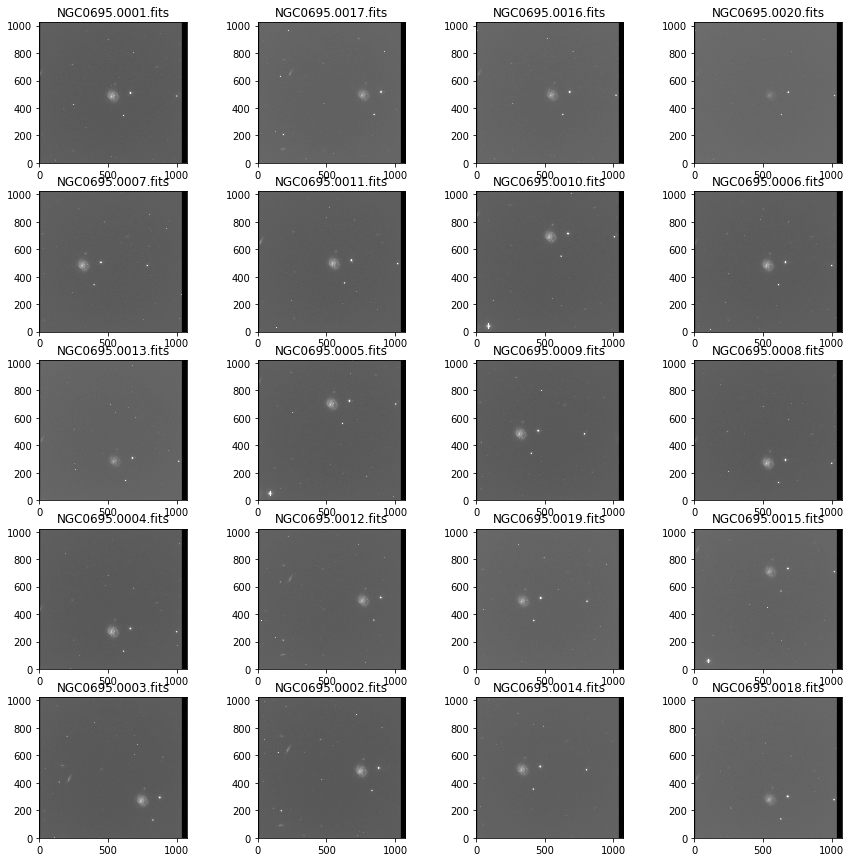

In [25]:
plot_grid(scicube,sci_list)

In [26]:
master_bias=np.average(biascube,axis=0)

Text(0.5,1,'Master Bias')

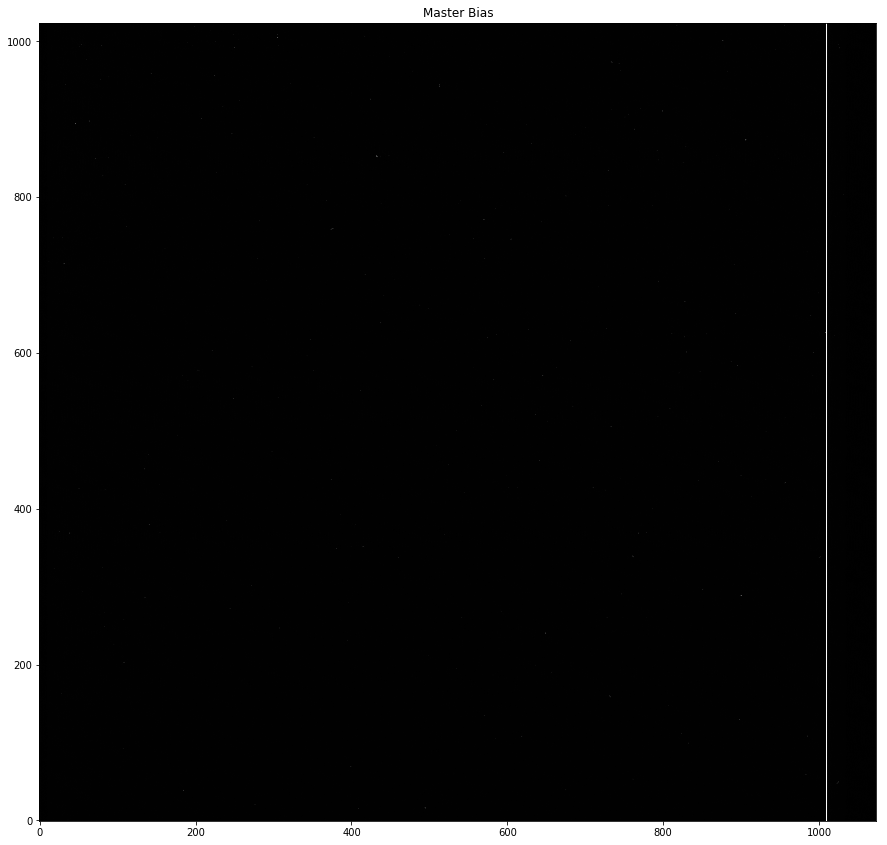

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(master_bias), origin='lower',cmap='gray');
plt.title('Master Bias')

In [28]:
debias_list_in=sci_list +vflat_list

In [29]:
debias_list_out = ['debiased_'+ im for im in debias_list_in]

In [30]:
debias_data_out={}
for i in range(len(debias_list_in)):
    debias_data_out[debias_list_out[i]]=raw_image_data[debias_list_in[i]]-master_bias

In [31]:
debiascube = np.stack([debias_data_out[image] for image in debias_list_out],axis=0)

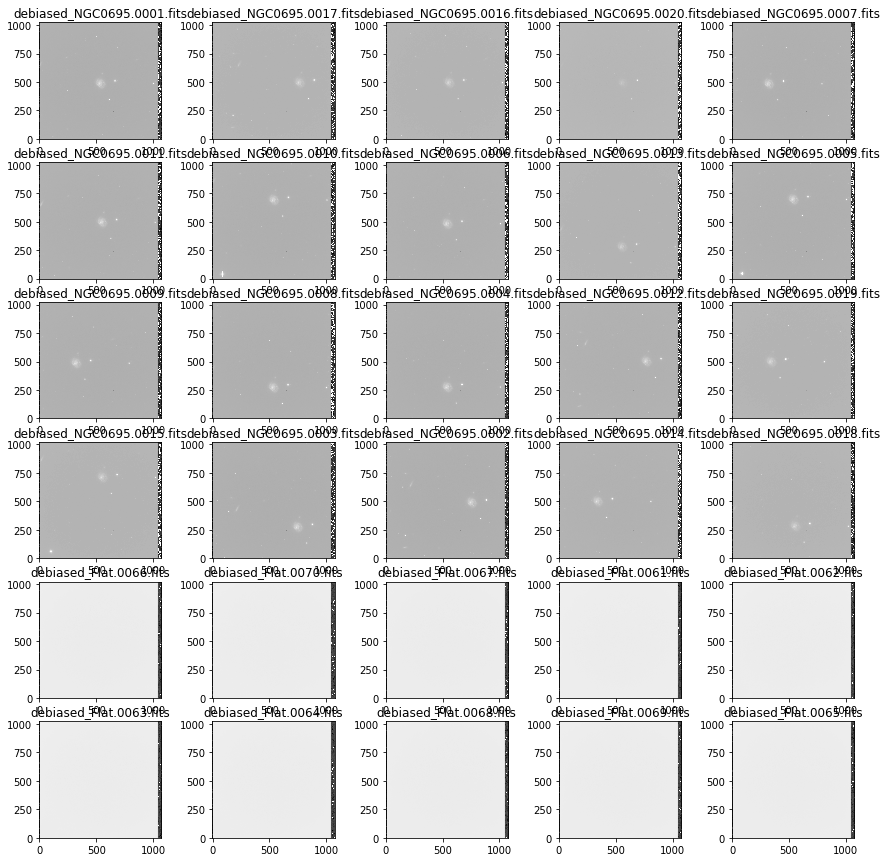

In [32]:
plot_grid(debiascube,debias_list_out)

Text(0.5,1,'debiased_NGC0695.0001.fits')

<Figure size 432x288 with 0 Axes>

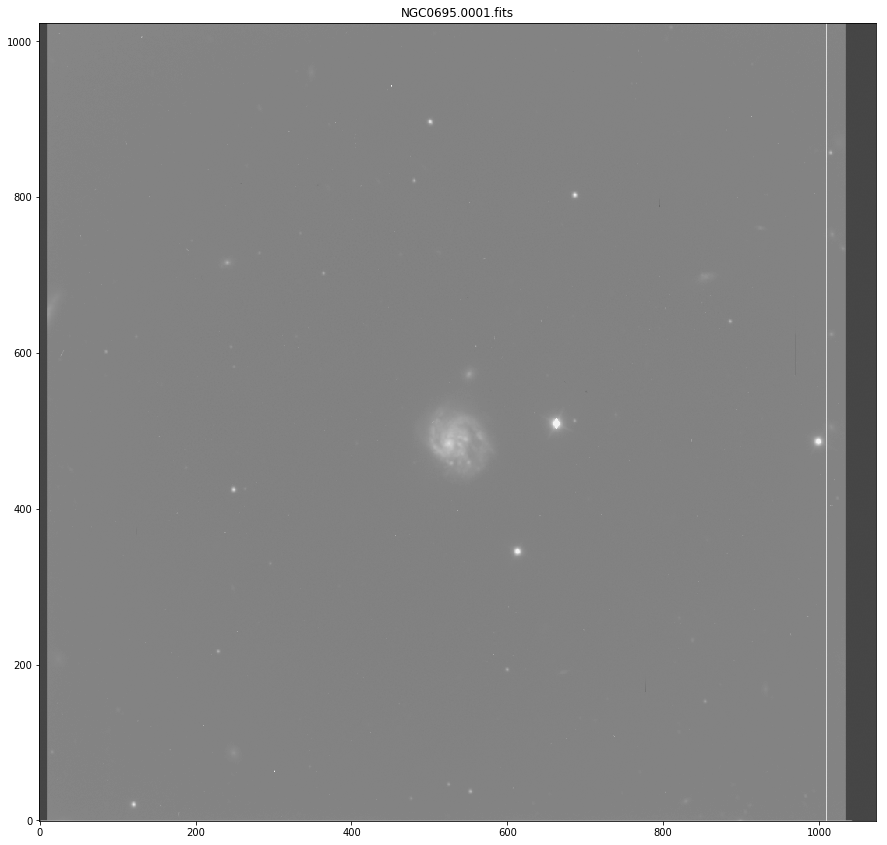

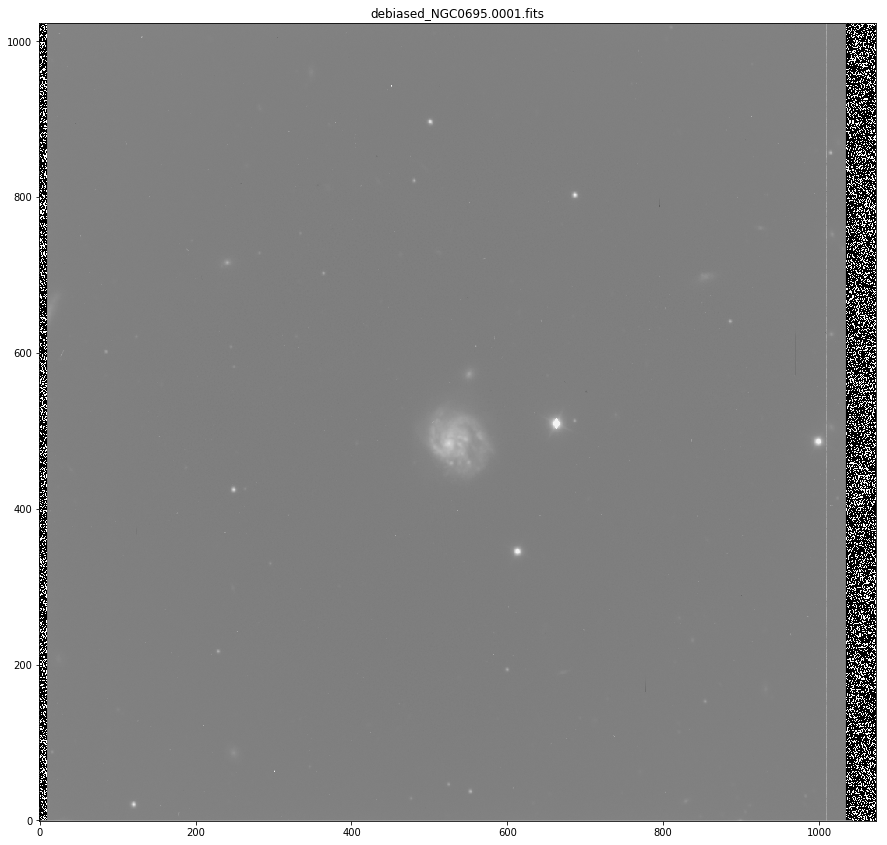

In [33]:
im = 0
graymin= 1
graymax= 5
plt.figure(1);
plt.figure(figsize = (15,15));
plt.imshow(np.log10(raw_image_data[debias_list_in[im]]),origin = 'lower',cmap='gray',vmin=graymin,vmax=graymax);
plt.title(debias_list_in[im])

plt.figure(2);
plt.figure(figsize=(15,15));
plt.imshow(np.log10(debias_data_out[debias_list_out[im]]),origin='lower',cmap='gray',vmin=graymin,vmax=graymax);
plt.title(debias_list_out[im])

In [34]:
debias_vflat_list=['debiased_'+image for image in vflat_list]
vflatcube = np.stack([debias_data_out[vflat_frame] for vflat_frame in debias_vflat_list],axis=0)
master_vflat=np.average(vflatcube, axis=0)

Text(0.5,1,'Master Flat')

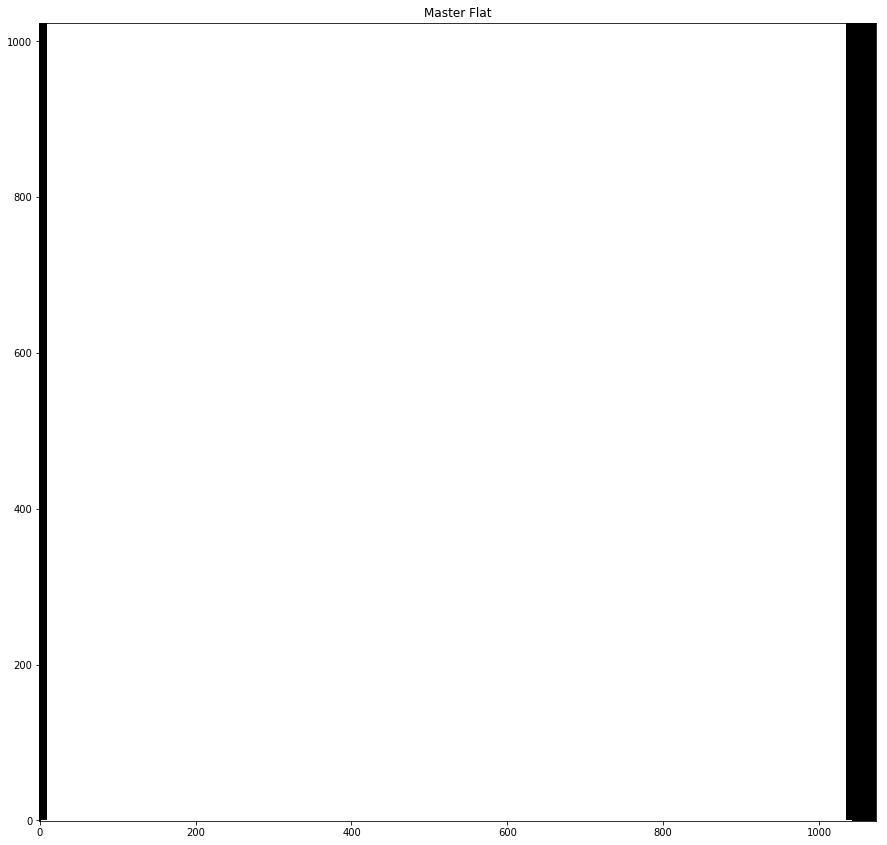

In [35]:
plt.figure(figsize=(15,15))
plt.imshow((master_vflat),origin='lower',cmap='gray',vmin=5250,vmax=6000)
plt.title('Master Flat')

In [36]:
print ('master flat median: ' + str(np.median(master_vflat))+"counts" )
print ('master flat mean: ' + str(np.mean(master_vflat))+"counts" )
print ('master flat max value: ' + str(np.max(master_vflat))+ "counts")
print ('master flat min value: ' + str(np.min(master_vflat))+ "counts")

master flat median: 23656.000000000007counts
master flat mean: 22633.86094813855counts
master flat max value: 65411.09999999999counts
master flat min value: -0.49999999999999434counts


In [37]:
normalized_master_vflat=master_vflat/np.mean(master_vflat)

In [38]:
print ('normalized master flat median: ' + str(np.median(normalized_master_vflat)))
print ('normalized master flat mean: ' + str(np.mean(normalized_master_vflat)))
print ('normalized master flat max value: ' + str(np.max(normalized_master_vflat)))
print ('normalized master flat min value: ' + str(np.min(normalized_master_vflat)))


normalized master flat median: 1.0451597301142526
normalized master flat mean: 0.9999999999999993
normalized master flat max value: 2.889966504162849
normalized master flat min value: -2.2090795783611777e-05


Text(0.5,1,'Normalized Master Flat')

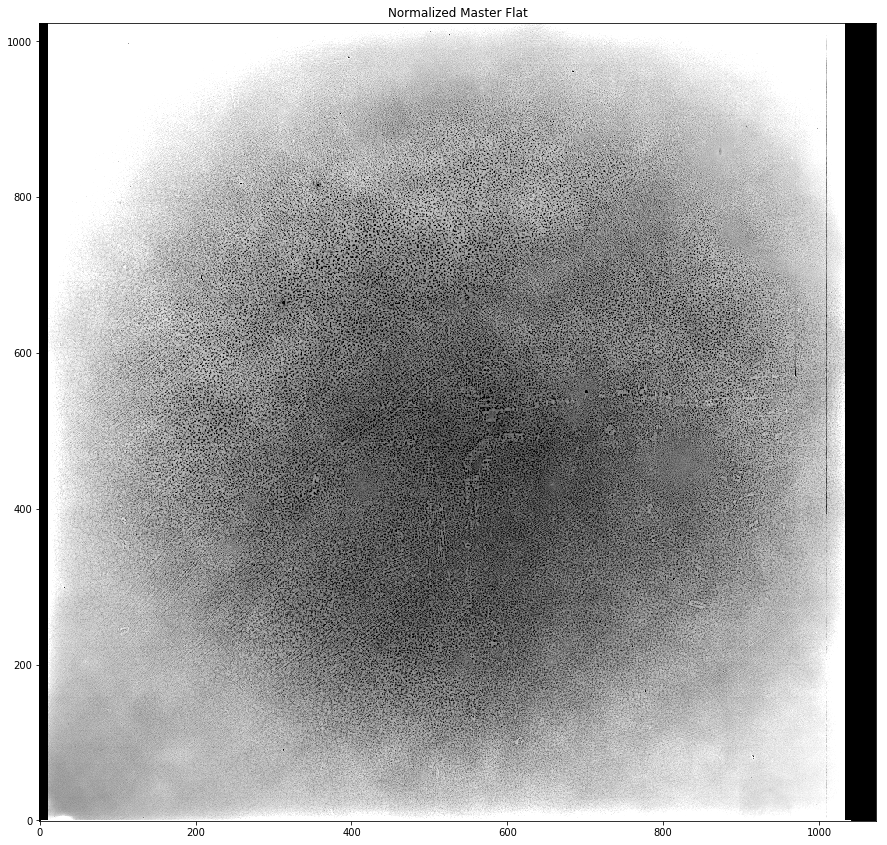

In [39]:
plt.figure(figsize=(15,15))
plt.imshow((normalized_master_vflat),origin='lower',cmap='gray',vmin=.95,vmax=1.1)
plt.title('Normalized Master Flat')

In [40]:
## we'll start with a list of the debiased M42 images: 
debias_sci_list = ['debiased_' + im for im in sci_list]
# print debias_m42_list ## this line is for troubleshooting

## and we'll make a corresponding list to name the flattened images: 
flat_debias_sci_list = ['flattened_' + im for im in debias_sci_list]
# print flat_debias_m42_list ## this line is for troubleshooting

## create an empty dictionary to populate with the completely corrected science frames: 
flat_debias_data_out = {} 

## and populate the dictionary with each corrected image
## where the dictionary keys = the images in flat_debias_m42_list
## we're iterating over an integer here again because the lists match up
for i in range(len(debias_sci_list)): 
    flat_debias_data_out[flat_debias_sci_list[i]] = \
    debias_data_out[debias_sci_list[i]]/normalized_master_vflat

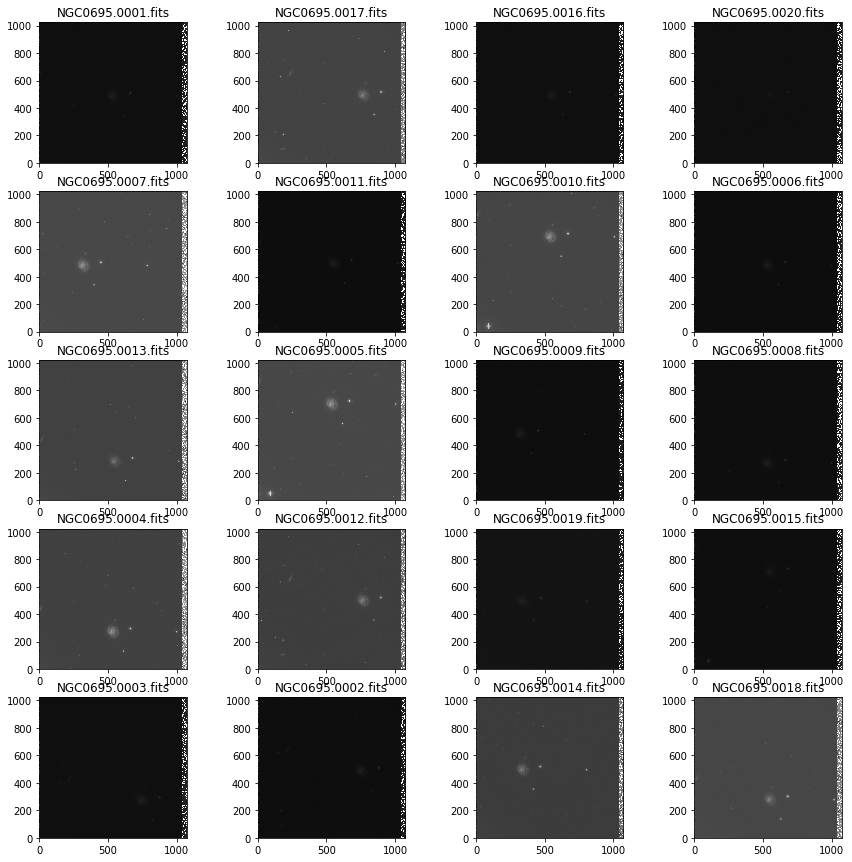

In [41]:
## create an array of corrected M42 images
sci_cube = np.stack([flat_debias_data_out[science_frame] for science_frame in flat_debias_sci_list],axis=0)
# print m42cube ## this line is for troubleshooting
# m42cube.shape ## this line is for troubleshooting

## show the images: 
plot_grid(sci_cube,sci_list)